## An Analysis of World Happiness in Relation to GDP, Government, and Corruption
#### John Ly (jtl222),  Nicole Nagura (nmn52)

The World Happiness Report is quoted as “a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be.” Our original question in thought was: Can we use metrics of perception of government corruption to predict peoples’ unhappiness in different countries? In this data set we found multiple metrics potentially correlating to one's happiness. This data set describes happiness through "Life Ladder". The World Happiness Report takes data from the Gallup World poll. In it the life ladder is quantified by the following question: Imagine a ladder starting with 0 at the bottom and 10 on top. The top represents the best possible life for you, while the bottom represents the worst possible life. Which step of the ladder do you personally feel you stand on at this time? Using this life ladder statistic in each country and comparing it to metrics such as Log GDP per capita, Freedom to make life choices, Perceptions of corruption, and Confidence in national government, that the answer to our original question was false. We found that multiple factors played a role in a country's happiness. GDP was the most significant factor in a country's happiness followed by confidence in national government, and then perceptions of corruption. 
https://worldhappiness.report/

In [419]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import datasets

In [420]:
x1 = pd.read_excel('Chapter2OnlineData.xls', sheet_name='Table2.1')
# print(x1.sheet_names)

#### This table describes information about the data collected
Table 2.1 https://worldhappiness.report/ed/2019/changing-world-happiness/ 

Technical Box 1: Detailed information about each of the predictors in Table 2.1
1. GDP per capita is in terms of Purchasing Power Parity (PPP) adjusted to constant 2011 international dollars, taken from the World Development Indicators (WDI) released by the World Bank on November 14, 2018. See Statistical Appendix 1 for more details. GDP data for 2018 are not yet available, so we extend the GDP time series from 2017 to 2018 using country-specific forecasts of real GDP growth from the OECD Economic Outlook No. 104 (Edition November 2018) and the World Bank’s Global Economic Prospects (Last Updated: 06/07/2018), after adjustment for population growth. The equation uses the natural log of GDP per capita, as this form fits the data significantly better than GDP per capita.
2. The time series of healthy life expectancy at birth are constructed based on data from the World Health Organization (WHO) Global Health Observatory data repository, with data available for 2005, 2010, 2015, and 2016. To match this report’s sample period, interpolation and extrapolation are used. See Statistical Appendix 1 for more details.
3. Social support is the national average of the binary responses (either 0 or 1) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
4. Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”
5. Generosity is the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” on GDP per capita.
6. Perceptions of corruption are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.
7. Positive affect is defined as the average of previous-day affect measures for happiness, laughter, and enjoyment for GWP waves 3-7 (years 2008 to 2012, and some in 2013). It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked. The general form for the affect questions is: Did you experience the following feelings during a lot of the day yesterday? See pp. 1-2 of Statistical Appendix 1 for more details.
8. Negative affect is defined as the average of previous-day affect measures for worry, sadness, and anger for all waves.

In [423]:
x1.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [422]:
x1.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WV

In [267]:
x1.drop([
    'Generosity',
    'Most people can be trusted, WVS round 1981-1984',
    'Most people can be trusted, WVS round 1989-1993',
    'Most people can be trusted, WVS round 1994-1998',
    'Most people can be trusted, WVS round 1999-2004',
    'Most people can be trusted, WVS round 2005-2009',
    'Most people can be trusted, WVS round 2010-2014'], axis=1)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906,0.286315
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318,0.275833
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540,NaN
5,Afghanistan,2013,3.572100,7.522238,0.483552,52.560001,0.577955,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368,NaN
6,Afghanistan,2014,3.130896,7.516955,0.525568,52.880001,0.508514,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974,NaN
7,Afghanistan,2015,3.982855,7.500539,0.528597,53.200001,0.388928,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918,NaN
8,Afghanistan,2016,4.220169,7.497038,0.559072,53.000000,0.522566,0.793246,0.564953,0.348332,0.324990,-1.855426,-1.392713,1.796219,0.425627,NaN,NaN,0.418629,NaN
9,Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,0.954393,0.496349,0.371326,0.261179,-1.886566,-1.437808,1.454051,0.546283,NaN,NaN,0.286599,NaN


In [424]:
%matplotlib inline
plt.style.use('seaborn-talk')

import seaborn as sns

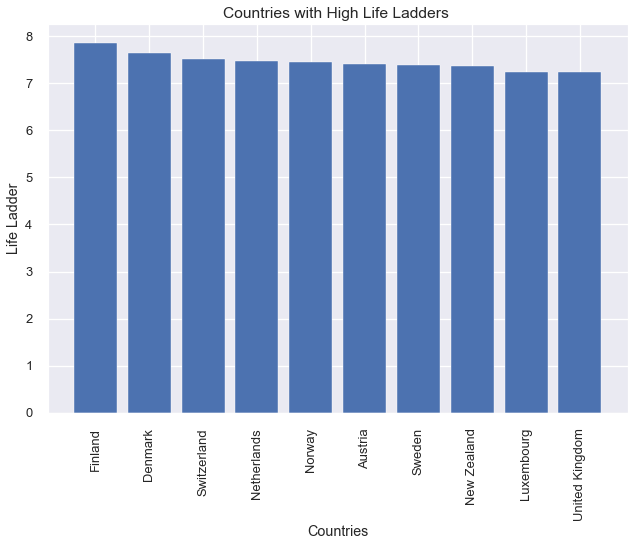

<BarContainer object of 10 artists>

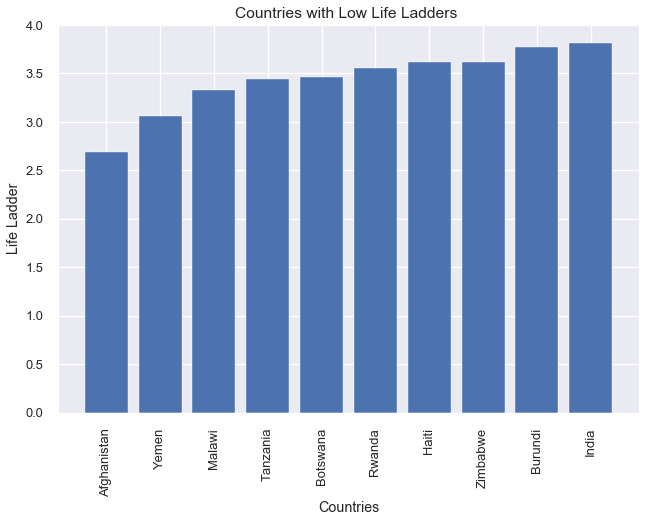

In [425]:
ll = x1.loc[(x1['Year']==2018)]
ll = ll.nlargest(10,"Life Ladder")
Y= ll['Life Ladder']
X = ll['Country name']
plt.xticks(rotation='vertical')
plt.xlabel('Countries')
plt.ylabel('Life Ladder')
plt.title('Countries with High Life Ladders ')
plt.bar(X,Y)

plt.show()

ll = x1.loc[(x1['Year']==2018)]
ll = ll.nsmallest(10,"Life Ladder")
Y= ll['Life Ladder']
X = ll['Country name']
plt.xticks(rotation='vertical')
plt.xlabel('Countries')
plt.ylabel('Life Ladder')
plt.title('Countries with Low Life Ladders ')
plt.bar(X,Y)

In this visualization, we looked to determine the range of life ladders in the year 2018. We graphed the countries with the 10 highest and 10 lowest life ladder scores. At the high end, countries ranged from 7-8 and were and were all first world countries. Looking at the bottom 10 countries, they were mostly underdeveloped countries and their life ladders ranged between 2.5 and 4. 

In [445]:
l2 = x1.drop(['Healthy life expectancy at birth','Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
        'Generosity',
        'Most people can be trusted, WVS round 1981-1984',
        'Most people can be trusted, WVS round 1989-1993',
        'Most people can be trusted, WVS round 1994-1998',
        'Most people can be trusted, WVS round 1999-2004',
        'Most people can be trusted, WVS round 2005-2009',
        'Most people can be trusted, WVS round 2010-2014'], axis=1)
l2.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,"Most people can be trusted, Gallup"
0,Afghanistan,2008,3.723590,7.168690,0.450662,0.718114,0.881686,0.517637,0.258195,0.612072,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,0.678896,0.850035,0.583926,0.237092,0.611545,0.286315
2,Afghanistan,2010,4.758381,7.386629,0.539075,0.600127,0.706766,0.618265,0.275324,0.299357,0.275833
3,Afghanistan,2011,3.831719,7.415019,0.521104,0.495901,0.731109,0.611387,0.267175,0.307386,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,0.530935,0.775620,0.710385,0.267919,0.435440,NaN


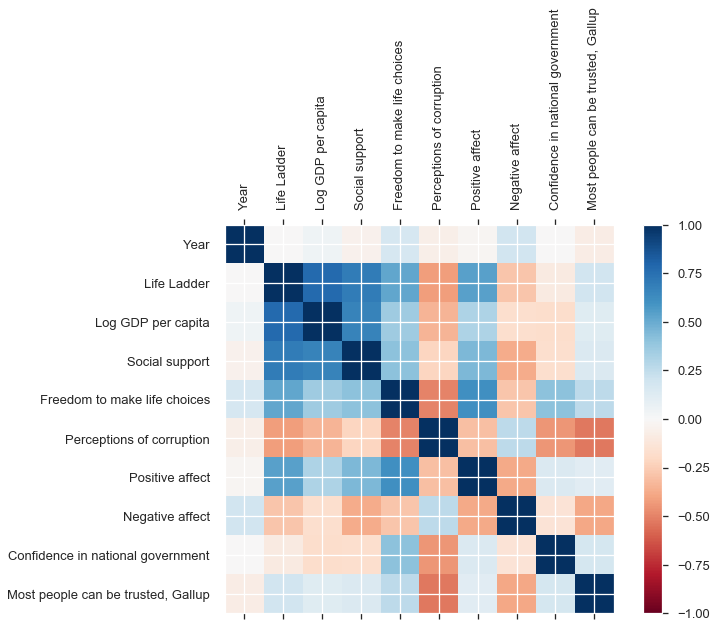

In [446]:
corr = l2.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.colorbar(ax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1))

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

plt.show()

Here, we sorted the data and dropped factors that we deemed to have little significance or not enough data. This correlation matrix helps us determine a few of the most significant features for our data. This shows that GDP has a strong correlation with life ladder scores followed by social support. Perceptions of corruption was weakly correlated with life ladder hinting that our hypothesis likely to be invalid. We reasoned that this correlation matrix worked because the positive affect was strongly correlated with life ladder and freedom to make choices. 

In [447]:
l2 = l2.drop(['Most people can be trusted, Gallup'], axis=1)
l2 = l2.dropna()
l2.head()


,Country name,Year,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.168690,0.450662,0.718114,0.881686,0.517637,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.333790,0.552308,0.678896,0.850035,0.583926,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.386629,0.539075,0.600127,0.706766,0.618265,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.415019,0.521104,0.495901,0.731109,0.611387,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.517126,0.520637,0.530935,0.775620,0.710385,0.267919,0.435440


In [448]:
l2 = l2.apply(lambda x: x if (x.name=='Country name' or x.name=='Year') else (x*100).astype(int))
X=l2.drop(['Life Ladder','Country name', 'Year'], axis=1)
y=l2['Life Ladder']
l2.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,372,716,45,71,88,51,25,61
1,Afghanistan,2009,440,733,55,67,85,58,23,61
2,Afghanistan,2010,475,738,53,60,70,61,27,29
3,Afghanistan,2011,383,741,52,49,73,61,26,30
4,Afghanistan,2012,378,751,52,53,77,71,26,43


Here we changed the factor values from floats into integers for the Random Forest Classifier to be able to handle our dataset. 

In [455]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# #Knearest neighbors
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# knn_pred_train = knn.predict(X_train)
# knn_pred_test = knn.predict(X_test)
# print("Train Accuracy: ", accuracy_score(y_train, knn_pred_train))
# print("Test Accuracy: ", accuracy_score(y_test, knn_pred_test))

In [456]:
# model=tree.DecisionTreeClassifier(max_depth=100, random_state=0)

# #TODO: train the model
# model.fit(X_train,y_train)

# #TODO: Calculate the training and testing accuracy
# dtree_pred_train = model.predict(X_train)
# dtree_pred_test = model.predict(X_test)
# print("Train Accuracy: ", accuracy_score(dtree_pred_train, y_train))
# print("Test Accuracy: ", accuracy_score(dtree_pred_test,y_test))

## Random Forest Classifier

In [457]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = RandomForestClassifier(max_depth=40, random_state=0)
clf.fit(X, y)
# RandomForestClassifier(max_depth=2, random_state=0)
print(clf.feature_importances_)
clf_pred_train = clf.predict(X_train)
clf_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(clf_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(clf_pred_test,y_test))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.39862966 0.27887    0.32250034]
Train Accuracy:  0.9827760891590679
Test Accuracy:  0.9815195071868583


We chose to do this Random Forest Classifier with all of the factors to determine which factors had the most impact towards determining life ladder scores. Here, we see that roughly all of them have similar impacts in determining life ladder with GDP being the most signifant. GDP per capita (17%) is a big indicator of Life Ladder. Confidence in national government (15%), Perceptions of corruption  (14%) and Freedom to make life choices (14%) have some correlation. 

In [454]:
X=l2.drop(['Life Ladder','Country name', 'Year', 'Social support', 'Freedom to make life choices','Positive affect','Negative affect'], axis=1)
y=l2['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = RandomForestClassifier(max_depth=40, random_state=0)
clf.fit(X, y)
# RandomForestClassifier(max_depth=2, random_state=0)
print(clf.feature_importances_)
clf_pred_train = clf.predict(X_train)
clf_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(clf_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(clf_pred_test,y_test))

[0.39862966 0.27887    0.32250034]
Train Accuracy:  0.9787234042553191
Test Accuracy:  0.9897330595482546


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Taking the top three factors that we found in our first Random Forest Classifier, we recalculated new correlation values using the Random Forest Classifier machine learning model. Here, we saw larger discrepancies between GDP, confidence in national government, and perceptions of corruption. After playing with the depth sizes for both of them, we found that our test accuracy was quite good at around 99%. 

## Kmeans

In [458]:
l3=l2.copy()
l3 = l2.apply(lambda x: (x/200).astype(int) if (x.name=='Life Ladder') else x)
# X=l2.drop(['Life Ladder','Country name', 'Year'], axis=1)
# y=l2['Life Ladder']
l3.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,1,716,45,71,88,51,25,61
1,Afghanistan,2009,2,733,55,67,85,58,23,61
2,Afghanistan,2010,2,738,53,60,70,61,27,29
3,Afghanistan,2011,1,741,52,49,73,61,26,30
4,Afghanistan,2012,1,751,52,53,77,71,26,43


In [459]:
l3_target = pd.DataFrame(l3['Life Ladder'], columns=['Life Ladder'])
l3 = l3.drop('Life Ladder', axis=1)
l3_with_target = pd.concat([l3, l3_target], axis=1)

l3 = l3.drop(['Positive affect', 'Social support', 'Year','Negative affect'], axis=1)

l3_with_target = l3_with_target.drop(['Country name', 'Year','Social support','Positive affect','Negative affect', 'Freedom to make life choices'],  axis=1)

l3_with_target.head()

,Log GDP per capita,Perceptions of corruption,Confidence in national government,Life Ladder
0,716,88,61,1
1,733,85,61,2
2,738,70,29,2
3,741,73,30,1
4,751,77,43,1


In [460]:
l3_with_target['Life Ladder'].unique()

array([1, 2, 3, 4])

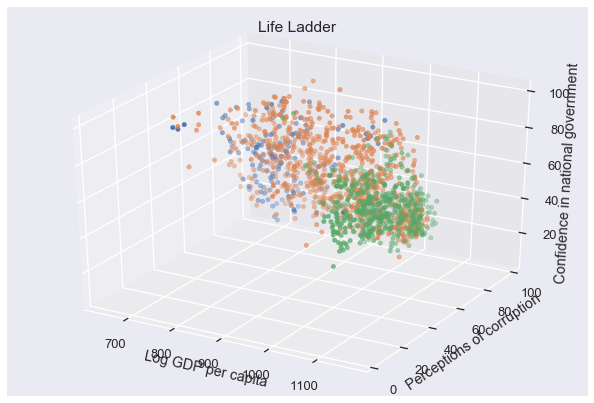

In [461]:
from mpl_toolkits.mplot3d import Axes3D
fig  = plt.figure()
ax = fig.add_subplot(111,projection='3d')

k = len(l3_with_target['Life Ladder'].unique())
for i in l3_with_target['Life Ladder'].unique():
    # select only the applicable rows
    ds = l3_with_target[l3_with_target['Life Ladder'] == i]
    # plot the points
ax.scatter(ds[['Log GDP per capita']],ds[['Perceptions of corruption']],ds[['Confidence in national government']],'o')
ax.set_title('Life Ladder')
ax.set_xlabel('Log GDP per capita')
ax.set_ylabel('Perceptions of corruption')
ax.set_zlabel('Confidence in national government')
plt.show()

Here we graphed our 3 most correlating factors. They are colored according to Life Ladder. We divided the Life Ladder values by 2 and then casted them into ints in order to group them into more distinguishable groups. The Life Ladder ranges were grouped into [2,4), [4,6), [6,8), and  [8,10). They can be seen grouped by different colors.

In [380]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(l3_with_target)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

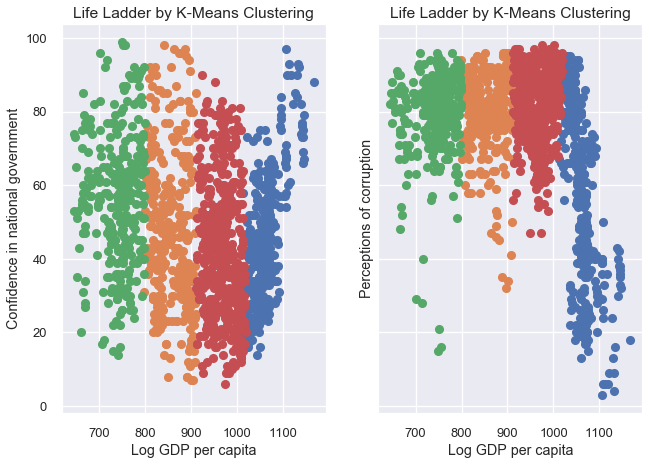

In [418]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

_, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for i in range(k):
    # select only data observations from the applicable cluster
    ds = l3.iloc[np.where(labels==i)]
    # plot the data observations
    ax1.plot(ds['Log GDP per capita'],ds['Confidence in national government'],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
ax1.set_title("Life Ladder by K-Means Clustering")
ax1.set_xlabel('Log GDP per capita')
ax1.set_ylabel('Confidence in national government')

for i in range(k):
    # select only data observations from the applicable cluster
    ds = l3.iloc[np.where(labels==i)]
    # plot the data observations
    ax2.plot(ds['Log GDP per capita'],ds['Perceptions of corruption'],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
ax2.set_title("Life Ladder by K-Means Clustering")
ax2.set_xlabel('Log GDP per capita')
ax2.set_ylabel('Perceptions of corruption')


plt.show()

Because it was difficult to differentiate between the groups in the 3D graph, we decided to created 2D models comparing GDP with the other 2 factors separately since GDP was our strongest correlation variable. According to the color groupings, it seems that higher GDP is strongly correlated to higher life ladders. Notably, it can be seen from the righthand side graph that countries with a higher GDP (above 1,100 GDP per capita) have more countries showing lower perceptions of corruption in addition to higher confidence in their government.

From our analysis, we found that while corruption was not a main differentiator in terms of a country's life ladder (how we chose to measure happiness for a country), we found that GDP was the strongest indicator of a country's happiness in terms of life ladder. However, it appears for countries with extremely low perceptions of corruption, there is a greater number of countries in this range with high life ladders. 